##  TASK 2 TO EXPLORE SUPERVISED MACHINE LEARNING
 
### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [21]:
# Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [22]:
#read dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [23]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


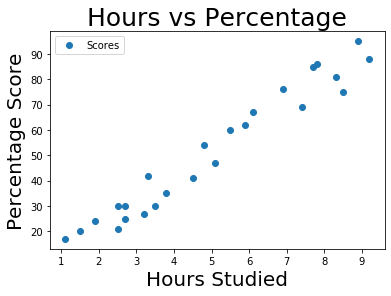

In [25]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',fontsize=25)  
plt.xlabel('Hours Studied',fontsize=20)  
plt.ylabel('Percentage Score',fontsize=20)   
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

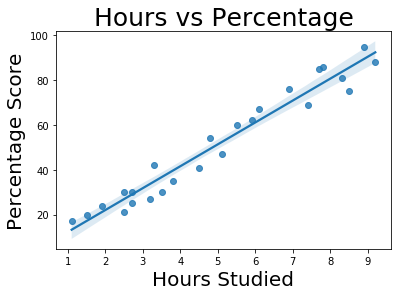

In [26]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title('Hours vs Percentage',fontsize=25)  
plt.xlabel('Hours Studied',fontsize=20)  
plt.ylabel('Percentage Score',fontsize=20)   
plt.show()

### **Preparing the data**
    The next step is to divide  the data into 'attributes' and 'labels'

In [27]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [28]:
display(X,y)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)


We have split our data into training and testing sets. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [30]:
y_test.shape

(5,)

In [31]:
X_test.shape

(5, 1)

In [32]:
y_train.shape

(20,)

In [33]:
X_train.shape

(20, 1)

In [34]:
### **Training the Algorithm**

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression().fit(X_train,y_train)
n=regressor.coef_
c=regressor.intercept_ 

print("Training complete.")

Training complete.


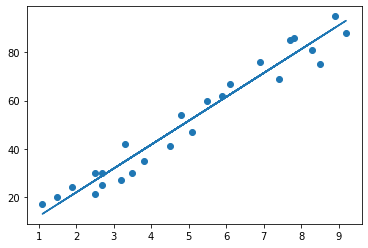

In [36]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [37]:
#making the predictions
print(X_test)                       # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [40]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. 

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
